### Using an unsupervised Learning approach to assess the different groups of loan applicants

***This is a large and rich dataset from the U.S. Small Business Administration (SBA) and an accompanying assignment designed to teach statistics as an investigative process of decision making are presented. Guidelines for the assignment titled “Should This Loan Be Approved or Denied?,” along with a subset of the larger dataset, are provided.*** 

For this case-study assignment, I decided to use an unsupervised learning approach rather than the conventional supervised learning approach to better understand the different groups of loan applications

***Description of dataset variables***



### Read CSV File

In [125]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("data/SBAnational.csv")


In [126]:
df.columns

Index(['Unnamed: 0', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

In [127]:
df.shape

(4000, 28)

### Data Preprocessing 

##### Remove dollar signs from all columns with the function below

In [128]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

##### Keep top 4000 rows

In [129]:
#keep top 4000 rows

df = df[:4000]
df['DisbursementGross'] = df['DisbursementGross'].apply(clean_currency).astype('float')
df['BalanceGross'] = df['BalanceGross'].apply(clean_currency).astype('float')
df['GrAppv'] = df['GrAppv'].apply(clean_currency).astype('float')
df['SBA_Appv'] = df['SBA_Appv'].apply(clean_currency).astype('float')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(clean_currency).astype('float')


In [130]:
df.head()

Unnamed: 0  LoanNr_ChkDgt                           Name          City  \
0           0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE   
1           1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS   
2           2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON   
3           3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW   
4           4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO   

  State    Zip                           Bank BankState   NAICS ApprovalDate  \
0    IN  47711               FIFTH THIRD BANK        OH  451120    28-Feb-97   
1    IN  46526                1ST SOURCE BANK        IN  722410    28-Feb-97   
2    IN  47401        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97   
3    OK  74012  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97   
4    FL  32801        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97   

   ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
0        1997    84      4     2.000          0            0              1   
1        1997    60      2     2.000          0            0              1   
2        1997   180      7     1.000          0            0              1   
3        1997    60      2     1.000          0            0              1   
4        1997   240     14     1.000          7            7              1   

   UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
0           0         N      Y        NaN        28-Feb-99          60000.000   
1           0         N      Y        NaN        31-May-97          40000.000   
2           0         N      N        NaN        31-Dec-97         287000.000   
3           0         N      Y        NaN        30-Jun-97          35000.000   
4           0         N      N        NaN        14-May-97         229000.000   

   BalanceGross MIS_Status  ChgOffPrinGr     GrAppv   SBA_Appv  
0         0.000      P I F         0.000  60000.000  48000.000  
1         0.000      P I F         0.000  40000.000  32000.000  
2         0.000      P I F         0.000 287000.000 215250.000  
3         0.000      P I F         0.000  35000.000  28000.000  
4         0.000      P I F         0.000 229000.000 229000.000

In [131]:
df.shape

(4000, 28)

In [132]:
len(df)

4000

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4000 non-null   int64  
 1   LoanNr_ChkDgt      4000 non-null   int64  
 2   Name               3996 non-null   object 
 3   City               4000 non-null   object 
 4   State              4000 non-null   object 
 5   Zip                4000 non-null   int64  
 6   Bank               3996 non-null   object 
 7   BankState          3996 non-null   object 
 8   NAICS              4000 non-null   int64  
 9   ApprovalDate       4000 non-null   object 
 10  ApprovalFY         4000 non-null   int64  
 11  Term               4000 non-null   int64  
 12  NoEmp              4000 non-null   int64  
 13  NewExist           4000 non-null   float64
 14  CreateJob          4000 non-null   int64  
 15  RetainedJob        4000 non-null   int64  
 16  FranchiseCode      4000 

In [134]:
df.dtypes

Unnamed: 0             int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [135]:
df_num = df.select_dtypes(include='number')
df_num.head()

Unnamed: 0  LoanNr_ChkDgt    Zip   NAICS  ApprovalFY  Term  NoEmp  \
0           0     1000014003  47711  451120        1997    84      4   
1           1     1000024006  46526  722410        1997    60      2   
2           2     1000034009  47401  621210        1997   180      7   
3           3     1000044001  74012       0        1997    60      2   
4           4     1000054004  32801       0        1997   240     14   

   NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0     2.000          0            0              1           0   
1     2.000          0            0              1           0   
2     1.000          0            0              1           0   
3     1.000          0            0              1           0   
4     1.000          7            7              1           0   

   DisbursementGross  BalanceGross  ChgOffPrinGr     GrAppv   SBA_Appv  
0          60000.000         0.000         0.000  60000.000  48000.000  
1          40000.000         0.000         0.000  40000.000  32000.000  
2         287000.000         0.000         0.000 287000.000 215250.000  
3          35000.000         0.000         0.000  35000.000  28000.000  
4         229000.000         0.000         0.000 229000.000 229000.000

In [136]:
df_num.isna().sum()

Unnamed: 0           0
LoanNr_ChkDgt        0
Zip                  0
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
DisbursementGross    0
BalanceGross         0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [137]:
# Drop null values

#df = df.fillna(df.mean())
df_num = df_num.dropna()


In [138]:
df_num.shape

(4000, 17)

In [139]:
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


### Dimensionality reduction - Finding the optimal number of Principal components

### Rescaling the data and applying PCA

In [140]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_num) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# Reducing the dimensions of the data 
model = PCA(n_components = 3) 
X_principal = model.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 
X_principal.head()


P1     P2     P3
0 0.774 -0.395  0.305
1 0.594 -0.478  0.244
2 0.793 -0.115 -0.187
3 0.870 -0.172 -0.280
4 0.813  0.079 -0.028

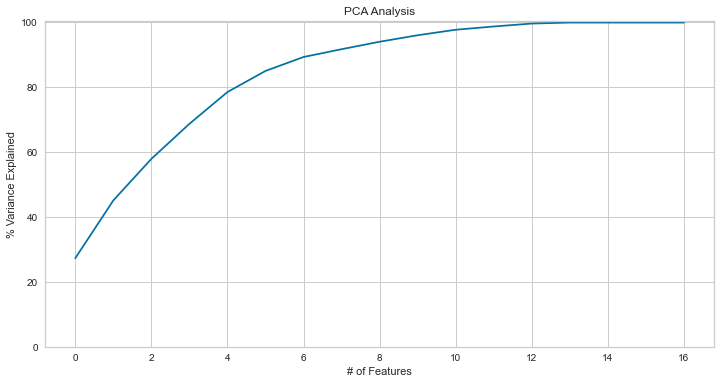

In [141]:
# n_components=10 because we have 17 features in the dataset
pca = PCA(n_components=17)
pca.fit(normalized_df)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

### Using Elbow Method to select optimal number of clusters 

Text(0, 0.5, 'Inertia')

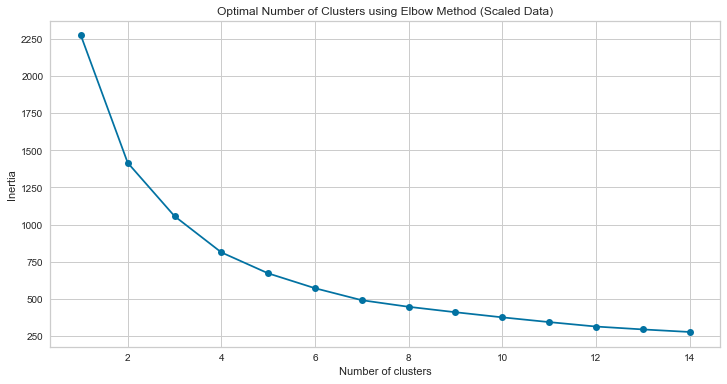

In [142]:
#Using Elbow Method to select optimal number of clusters based on PCA results

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X_principal)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.011s...
[t-SNE] Computed neighbors for 4000 samples in 0.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.265077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.001595
[t-SNE] KL divergence after 1000 iterations: 0.675508


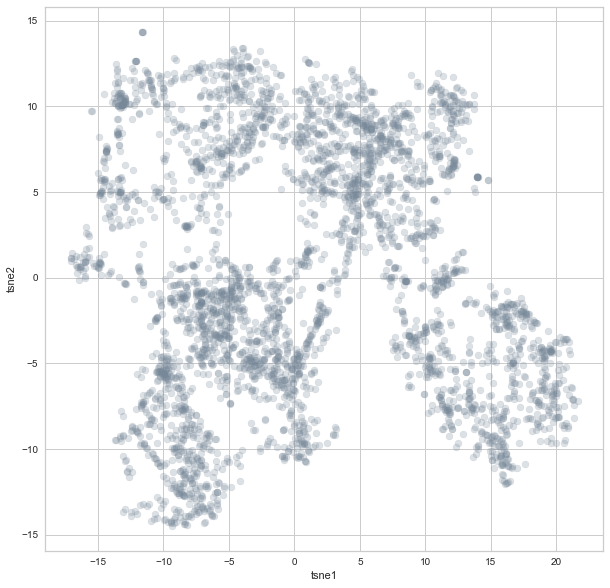

In [143]:
# Using TSNE to reduce dimension and visualise

tsne = TSNE(n_components=3, verbose=1, perplexity=60, n_iter=1000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(normalized_df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

### Using silhouette method to compare with Elbow method

In [144]:
#Check that silhouette method matches with Elbow method in terms of accuracy

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(tsne_df_scale)
    centers = clusterer.cluster_centers_

    score = silhouette_score(tsne_df_scale, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.32923784852027893)
For n_clusters = 3, silhouette score is 0.3927637040615082)
For n_clusters = 4, silhouette score is 0.43292930722236633)
For n_clusters = 5, silhouette score is 0.45859938859939575)
For n_clusters = 6, silhouette score is 0.4445752501487732)
For n_clusters = 7, silhouette score is 0.41179120540618896)
For n_clusters = 8, silhouette score is 0.4333570599555969)
For n_clusters = 9, silhouette score is 0.4312780201435089)


Text(0, 0.5, 'Inertia')

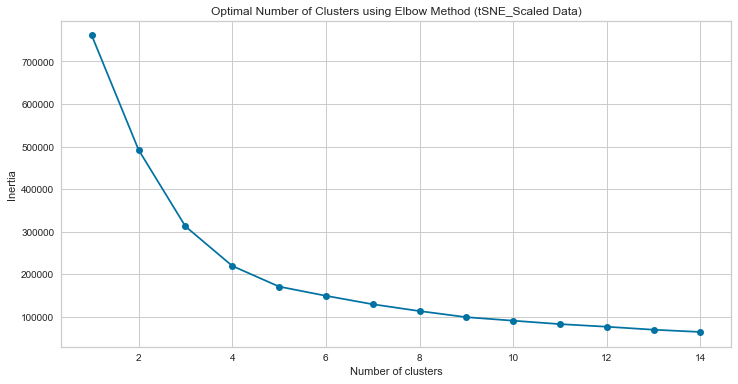

In [145]:
#Use Elbow Method to select optimal number of clusters based on TSNE results

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [146]:
kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)


KMeans tSNE Scaled Silhouette Score: 0.4588496685028076


In [147]:
clusters_tsne_scale.head()

tsne1  tsne2   tsne3  tsne_clusters
0  9.495  2.628 -10.157              4
1  9.168  2.132  -9.518              4
2  0.175  5.563   0.213              1
3 -7.922  6.819  -3.028              0
4  1.843  7.458   6.932              1

### TSNE + Kmeans Plot

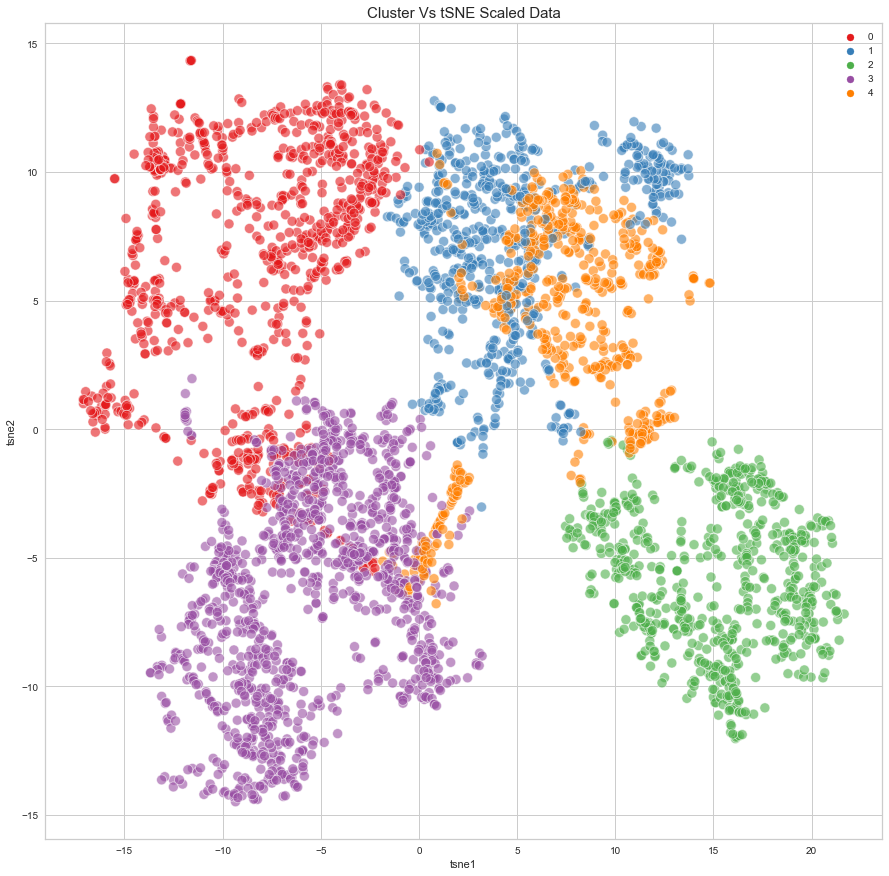

In [148]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vs tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()
#clusters_tsne_scale.to_csv("/Users/oluwatadeadekola/Downloads/Kmeans_Output.csv")


In [149]:
combine_all = pd.concat([df, clusters_tsne_scale], axis=1)
combine_all.to_csv("Kmeans_Output.csv")
combine_all.head()

Unnamed: 0  LoanNr_ChkDgt                           Name          City  \
0           0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE   
1           1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS   
2           2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON   
3           3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW   
4           4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO   

  State    Zip                           Bank BankState   NAICS ApprovalDate  \
0    IN  47711               FIFTH THIRD BANK        OH  451120    28-Feb-97   
1    IN  46526                1ST SOURCE BANK        IN  722410    28-Feb-97   
2    IN  47401        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97   
3    OK  74012  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97   
4    FL  32801        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97   

   ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
0        1997    84      4     2.000          0            0              1   
1        1997    60      2     2.000          0            0              1   
2        1997   180      7     1.000          0            0              1   
3        1997    60      2     1.000          0            0              1   
4        1997   240     14     1.000          7            7              1   

   UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
0           0         N      Y        NaN        28-Feb-99          60000.000   
1           0         N      Y        NaN        31-May-97          40000.000   
2           0         N      N        NaN        31-Dec-97         287000.000   
3           0         N      Y        NaN        30-Jun-97          35000.000   
4           0         N      N        NaN        14-May-97         229000.000   

   BalanceGross MIS_Status  ChgOffPrinGr     GrAppv   SBA_Appv  tsne1  tsne2  \
0         0.000      P I F         0.000  60000.000  48000.000  9.495  2.628   
1         0.000      P I F         0.000  40000.000  32000.000  9.168  2.132   
2         0.000      P I F         0.000 287000.000 215250.000  0.175  5.563   
3         0.000      P I F         0.000  35000.000  28000.000 -7.922  6.819   
4         0.000      P I F         0.000 229000.000 229000.000  1.843  7.458   

    tsne3  tsne_clusters  
0 -10.157              4  
1  -9.518              4  
2   0.213              1  
3  -3.028              0  
4   6.932              1

In [150]:
#combine_all.to_csv("/Users/oluwatadeadekola/Downloads/Kmeans_Output.csv")


In [151]:
combine_all[combine_all['tsne_clusters']==1].head()

Unnamed: 0  LoanNr_ChkDgt                            Name           City  \
2            2     1000034009           WHITLOCK DDS, TODD M.    BLOOMINGTON   
4            4     1000054004     ANASTASIA CONFECTIONS, INC.        ORLANDO   
5            5     1000084002  B&T SCREW MACHINE COMPANY, INC     PLAINVILLE   
13          13     1000154010     ORCHARD CAFE & BAKERY, INC.   SLATERSVILLE   
14          14     1000214004             EBC INVESTMENTS LLC  WINSTON-SALEM   

   State    Zip                            Bank BankState   NAICS  \
2     IN  47401         GRANT COUNTY STATE BANK        IN  621210   
4     FL  32801         FLORIDA BUS. DEVEL CORP        FL       0   
5     CT   6062   TD BANK, NATIONAL ASSOCIATION        DE  332721   
13    RI   2876        CITIZENS BANK NATL ASSOC        RI       0   
14    NC  27106  NORTHWEST PIEDMONT DEVEL CORPO        NC       0   

   ApprovalDate  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  \
2     28-Feb-97        1997   180      7     1.000          0            0   
4     28-Feb-97        1997   240     14     1.000          7            7   
5     28-Feb-97        1997   120     19     1.000          0            0   
13    28-Feb-97        1997   120      2     2.000          0            0   
14    28-Feb-97        1997   240      1     1.000         30            0   

    FranchiseCode  UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  \
2               1           0         N      N        NaN        31-Dec-97   
4               1           0         N      N        NaN        14-May-97   
5               1           0         N      N        NaN        30-Jun-97   
13              1           0         N      N        NaN        31-May-97   
14              1           0         N      N        NaN        17-Dec-97   

    DisbursementGross  BalanceGross MIS_Status  ChgOffPrinGr     GrAppv  \
2          287000.000         0.000      P I F         0.000 287000.000   
4          229000.000         0.000      P I F         0.000 229000.000   
5          517000.000         0.000      P I F         0.000 517000.000   
13         370000.000         0.000      P I F         0.000 370000.000   
14         225000.000         0.000      P I F         0.000 225000.000   

     SBA_Appv  tsne1  tsne2  tsne3  tsne_clusters  
2  215250.000  0.175  5.563  0.213              1  
4  229000.000  1.843  7.458  6.932              1  
5  387750.000  1.605 11.172  2.849              1  
13 277500.000  8.701  9.362 -3.211              1  
14 225000.000  4.032  5.402  7.708              1

In [152]:
combine_all[combine_all['tsne_clusters']==1].describe()

Unnamed: 0  LoanNr_ChkDgt       Zip      NAICS  ApprovalFY    Term  \
count     646.000        646.000   646.000    646.000     646.000 646.000   
mean     1968.632 1013249810.099 56359.802 335472.649    2000.195 186.961   
std      1078.286    7074214.293 31463.170 291021.714       4.080  90.900   
min         2.000 1000034009.000  1013.000      0.000    1997.000   1.000   
25%      1155.000 1007941502.250 30078.000      0.000    1997.000 104.250   
50%      2016.000 1013720507.500 60088.000 421830.000    1997.000 240.000   
75%      2820.500 1018664500.500 85033.500 561431.000    2006.000 240.000   
max      3995.000 1027134004.000 99999.000 812990.000    2006.000 318.000   

        NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
count 646.000   646.000    646.000      646.000        646.000     646.000   
mean   15.223     1.279      3.319        4.170      10918.726       0.497   
std    23.757     0.452      7.681       12.634      24173.490       0.686   
min     0.000     0.000      0.000        0.000          1.000       0.000   
25%     3.000     1.000      0.000        0.000          1.000       0.000   
50%     8.000     1.000      0.000        0.000          1.000       0.000   
75%    19.750     2.000      3.000        1.750          1.000       1.000   
max   290.000     2.000     55.000      150.000      90725.000       2.000   

       DisbursementGross  BalanceGross  ChgOffPrinGr      GrAppv    SBA_Appv  \
count            646.000       646.000       646.000     646.000     646.000   
mean          414875.372         0.000      3631.382  414633.786  321256.878   
std           401152.918         0.000     22924.900  386125.865  304344.751   
min             5000.000         0.000         0.000    5000.000    2500.000   
25%           140250.000         0.000         0.000  140250.000  105100.000   
50%           288706.500         0.000         0.000  290000.000  229250.000   
75%           556500.000         0.000         0.000  565750.000  450000.000   
max          3599911.000         0.000    386770.000 2500000.000 2000000.000   

        tsne1   tsne2   tsne3  tsne_clusters  
count 646.000 646.000 646.000        646.000  
mean    4.714   7.029   2.512          1.000  
std     3.694   3.322   3.829          0.000  
min    -1.607  -3.026  -5.778          1.000  
25%     1.868   4.990  -0.243          1.000  
50%     4.063   7.784   2.134          1.000  
75%     5.928   9.631   6.285          1.000  
max    13.742  12.772  10.407          1.000

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'LoanNr_ChkDgt'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'NAICS'}>,
        <AxesSubplot:title={'center':'ApprovalFY'}>],
       [<AxesSubplot:title={'center':'Term'}>,
        <AxesSubplot:title={'center':'NoEmp'}>,
        <AxesSubplot:title={'center':'NewExist'}>,
        <AxesSubplot:title={'center':'CreateJob'}>,
        <AxesSubplot:title={'center':'RetainedJob'}>],
       [<AxesSubplot:title={'center':'FranchiseCode'}>,
        <AxesSubplot:title={'center':'UrbanRural'}>,
        <AxesSubplot:title={'center':'DisbursementGross'}>,
        <AxesSubplot:title={'center':'BalanceGross'}>,
        <AxesSubplot:title={'center':'ChgOffPrinGr'}>],
       [<AxesSubplot:title={'center':'GrAppv'}>,
        <AxesSubplot:title={'center':'SBA_Appv'}>,
        <AxesSubplot:title={'center':'tsne1'}>,
        <AxesSubplot:title={'center':'tsne2'}>,
        <AxesS

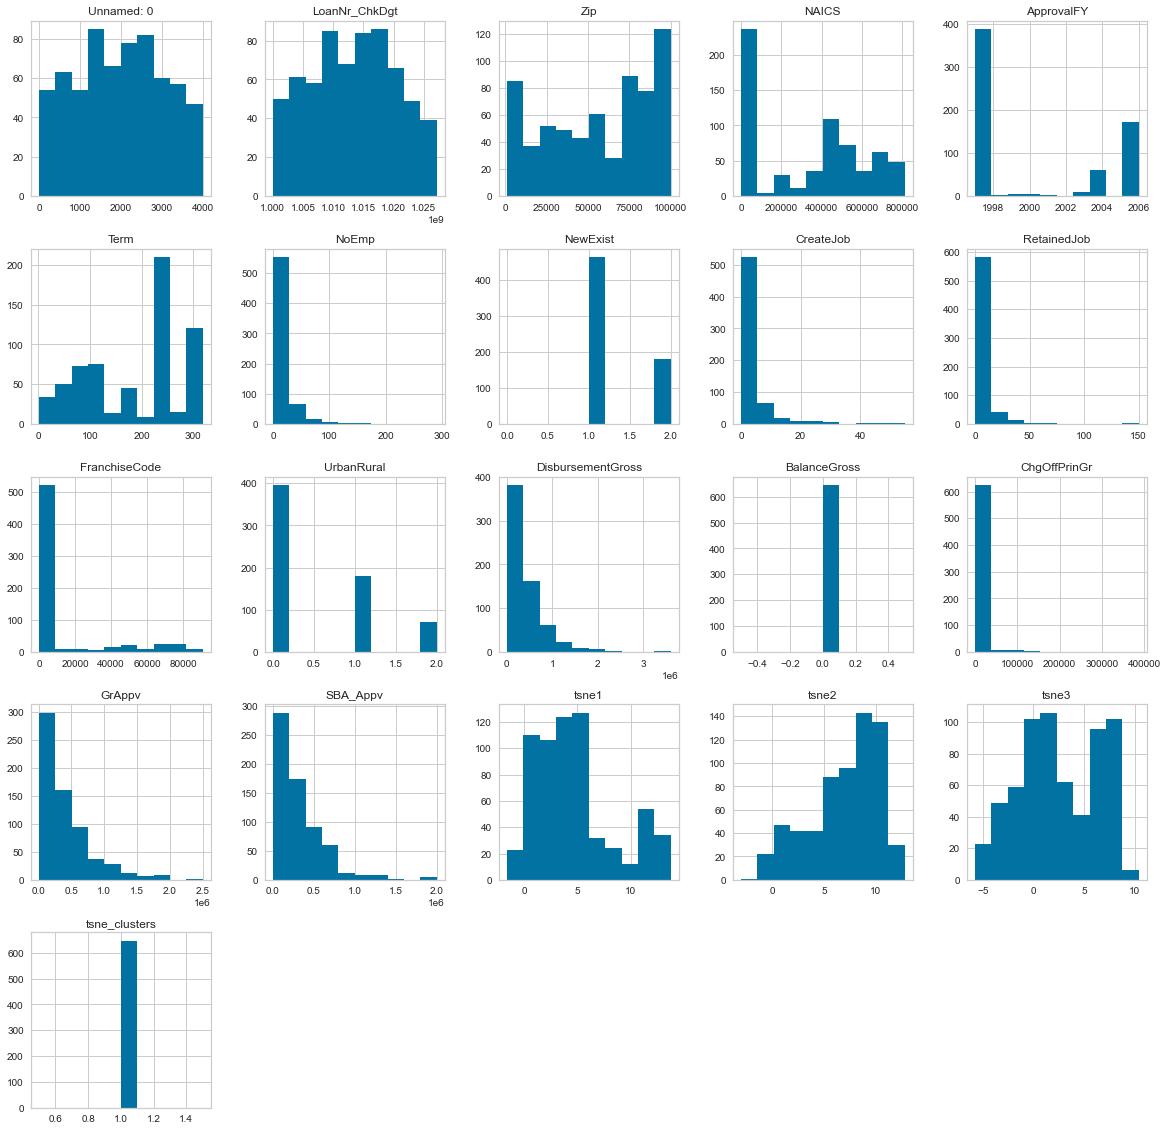

In [153]:
combine_all[combine_all['tsne_clusters']==1].hist(figsize=(20,20))

In [154]:
combine_all[combine_all['tsne_clusters']==2].head()

Unnamed: 0  LoanNr_ChkDgt                          Name         City  \
12          12     1000146010                        CARVEL         APEX   
49          49     1000686008  SIMCO PRE-OWNED AUTO BROKERS  WINSOR MILL   
67          67     1000766008              LILY DAY GARDENS       BURNET   
80          80     1000826002      GUADALAJARA DISTRIBUTORS  NORTH HILLS   
83          83     1000836005       URBAN BEAST-SEATTLE LLC      SEATTLE   

   State    Zip                            Bank BankState   NAICS  \
12    NC  27502           STEARNS BK NATL ASSOC        MN  445299   
49    MD  21244                       BBCN BANK        CA  441120   
67    TX  78611     WELLS FARGO BANK NATL ASSOC        SD  444220   
80    CA  91343                       BBCN BANK        CA  514199   
83    WA  98109  U.S. BANK NATIONAL ASSOCIATION        OH  453910   

   ApprovalDate  ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  \
12     7-Feb-06        2006   162      2     2.000          0            0   
49     7-Feb-06        2006    84      1     2.000          0            1   
67     7-Feb-06        2006    26      4     2.000          1            5   
80     7-Feb-06        2006    84      1     2.000          0            1   
83     7-Feb-06        2006     5      1     2.000          3            4   

    FranchiseCode  UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  \
12          15100           1         N      N        NaN        31-Mar-06   
49              1           1         0      N        NaN        28-Feb-06   
67              1           2         Y      N  27-Jan-11        28-Feb-06   
80              1           1         0      N        NaN        28-Feb-06   
83              1           1         0      N  24-May-10        31-Aug-06   

    DisbursementGross  BalanceGross MIS_Status  ChgOffPrinGr     GrAppv  \
12         253400.000         0.000      P I F         0.000 253400.000   
49          10000.000         0.000      P I F         0.000  10000.000   
67          60859.000         0.000     CHGOFF     19994.000  20000.000   
80           5000.000         0.000      P I F         0.000   5000.000   
83          28090.000         0.000     CHGOFF     28090.000  28300.000   

     SBA_Appv  tsne1  tsne2  tsne3  tsne_clusters  
12 190050.000 10.775 -1.014 -1.674              2  
49   8500.000 13.512 -4.939 -2.815              2  
67  10000.000 12.108 -7.173 -2.010              2  
80   4250.000 13.245 -7.058 -1.997              2  
83  24055.000 12.492 -7.527 -2.248              2

In [155]:
combine_all[combine_all['tsne_clusters']==2].describe()

Unnamed: 0  LoanNr_ChkDgt       Zip      NAICS  ApprovalFY    Term  \
count     687.000        687.000   687.000    687.000     687.000 687.000   
mean     2336.357 1015666377.457 37888.803 527561.843    2004.285  69.610   
std       995.109    6562619.550 27956.668 160722.833       0.924  26.881   
min        12.000 1000146010.000  1001.000 113110.000    1999.000   0.000   
25%      1520.000 1010395005.500 14190.500 443112.000    2004.000  60.000   
50%      2356.000 1015725003.000 33311.000 531311.000    2004.000  84.000   
75%      3189.000 1021095502.500 54914.500 621310.000    2004.000  84.000   
max      3989.000 1027085009.000 99336.000 926140.000    2006.000 246.000   

        NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
count 687.000   687.000    687.000      687.000        687.000     687.000   
mean    3.451     2.000      0.215        0.293        160.492       1.271   
std     6.212     0.000      0.775        0.946       1644.101       0.445   
min     0.000     2.000      0.000        0.000          1.000       1.000   
25%     1.000     2.000      0.000        0.000          1.000       1.000   
50%     2.000     2.000      0.000        0.000          1.000       1.000   
75%     3.000     2.000      0.000        0.000          1.000       2.000   
max    72.000     2.000      6.000        7.000      21425.000       2.000   

       DisbursementGross  BalanceGross  ChgOffPrinGr     GrAppv   SBA_Appv  \
count            687.000       687.000       687.000    687.000    687.000   
mean           57008.897         0.000      4025.236  47497.345  27400.028   
std            82062.229         0.000     12237.805  62963.476  42728.396   
min              803.000         0.000         0.000   5000.000   2500.000   
25%            10077.500         0.000         0.000  10000.000   5000.000   
50%            25200.000         0.000         0.000  25000.000  12500.000   
75%            64521.500         0.000         0.000  50400.000  25750.000   
max           690976.000         0.000    116869.000 450000.000 337500.000   

        tsne1   tsne2   tsne3  tsne_clusters  
count 687.000 687.000 687.000        687.000  
mean   15.113  -5.777   1.627          2.000  
std     3.523   2.716   3.035          0.000  
min     7.466 -12.033  -5.638          2.000  
25%    11.981  -7.780  -0.863          2.000  
50%    15.754  -5.590   1.888          2.000  
75%    17.916  -3.614   4.144          2.000  
max    21.655  -0.433   7.240          2.000

In [156]:
df.columns

Index(['Unnamed: 0', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

In [157]:
df.shape

(4000, 28)

### Building An Anomaly Detection Model for the Loan dataset

In [158]:
#General stats of df_A training features
df_tr_features = df[['LoanNr_ChkDgt', 'BalanceGross', 
                    'DisbursementGross', 'GrAppv', 
                     'SBA_Appv']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_tr_features.describe()

LoanNr_ChkDgt  BalanceGross  DisbursementGross      GrAppv    SBA_Appv
count       4000.000      4000.000           4000.000    4000.000    4000.000
mean  1013464058.281         0.000         136322.098  128445.825   90918.746
std      7590365.823         0.000         223941.092  216759.707  169559.291
min   1000014003.000         0.000              0.000    3000.000    1500.000
25%   1006922753.000         0.000          30000.000   25000.000   14250.000
50%   1013534005.000         0.000          63124.000   50000.000   31650.000
75%   1019697255.250         0.000         140000.000  121025.000   80000.000
max   1027175001.000         0.000        3599911.000 2500000.000 2000000.000

In [159]:
df_tr_features_train = df_tr_features.iloc[:3000,:]
df_tr_features_test = df_tr_features.iloc[3001:,:]
print('Data for Modeling: ' + str(df_tr_features_train.shape))
print('Unseen Data For Predictions: ' + str(df_tr_features_test.shape))

Data for Modeling: (3000, 5)
Unseen Data For Predictions: (999, 5)


In [160]:
from pycaret.utils import version
from pycaret.anomaly import *
exp_ano = setup(df_tr_features, normalize = True)

### Creating a model


In [161]:
## creating a model
iforest=create_model('iforest', contamination=0.05)
print (iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=8369, verbose=0)


### Model Evaluation


In [162]:
#evaluate a model
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

In [163]:
iforest_predictions = predict_model(iforest, data = df_tr_features)


In [164]:
iforest_predictions

LoanNr_ChkDgt  BalanceGross  DisbursementGross     GrAppv   SBA_Appv  \
0        1000014003         0.000          60000.000  60000.000  48000.000   
1        1000024006         0.000          40000.000  40000.000  32000.000   
2        1000034009         0.000         287000.000 287000.000 215250.000   
3        1000044001         0.000          35000.000  35000.000  28000.000   
4        1000054004         0.000         229000.000 229000.000 229000.000   
...             ...           ...                ...        ...        ...   
3995     1027134004         0.000         600000.000 600000.000 450000.000   
3996     1027154010         0.000         369000.000 369000.000 276750.000   
3997     1027155006         0.000          59809.000  30000.000  15000.000   
3998     1027165009         0.000          57000.000  50000.000  25000.000   
3999     1027175001         0.000         116000.000 116000.000  58000.000   

      Anomaly  Anomaly_Score  
0           0         -0.131  
1           0         -0.130  
2           0         -0.031  
3           0         -0.131  
4           0         -0.033  
...       ...            ...  
3995        1          0.037  
3996        0         -0.006  
3997        0         -0.118  
3998        0         -0.142  
3999        0         -0.106  

[4000 rows x 7 columns]

In [165]:
(iforest_predictions['Anomaly'] == 1).sum()

200

In [166]:
iforest_predictions[iforest_predictions['Anomaly'] == 1].head(10)

LoanNr_ChkDgt  BalanceGross  DisbursementGross      GrAppv    SBA_Appv  \
5      1000084002         0.000         517000.000  517000.000  387750.000   
6      1000093009         0.000         600000.000  600000.000  499998.000   
20     1000324002         0.000         615000.000  615000.000  461250.000   
23     1000434000         0.000        1250000.000 1250000.000  937500.000   
31     1000524003         0.000         600000.000  600000.000  450000.000   
58     1000726007         0.000        1350000.000 1350000.000 1012500.000   
63     1000754002         0.000         745000.000  745000.000  558750.000   
71     1000786003         0.000        1524200.000 1535000.000 1151250.000   
77     1000816010         0.000         577000.000  300000.000  150000.000   
90     1000904010         0.000         357000.000  357000.000  357000.000   

    Anomaly  Anomaly_Score  
5         1          0.039  
6         1          0.057  
20        1          0.054  
23        1          0.146  
31        1          0.048  
58        1          0.157  
63        1          0.079  
71        1          0.173  
77        1          0.021  
90        1          0.001

In [167]:
plot_model(iforest, plot = 'umap')

### Test Model 

In [168]:
unseen_predictions = predict_model(iforest, data=df_tr_features_test)
unseen_predictions.head(10)

LoanNr_ChkDgt  BalanceGross  DisbursementGross     GrAppv   SBA_Appv  \
3001     1019705005         0.000          75000.000  75000.000  37500.000   
3002     1019706001         0.000          27376.000  27700.000  13850.000   
3003     1019714001         0.000          50000.000  50000.000  40000.000   
3004     1019716004         0.000         557000.000 557000.000 557000.000   
3005     1019725000         0.000           3393.000  40000.000  20000.000   
3006     1019734007         0.000         100000.000 100000.000  80000.000   
3007     1019735003         0.000         160409.000 100000.000  50000.000   
3008     1019745006         0.000          40000.000  40000.000  20000.000   
3009     1019746002         0.000         100000.000 100000.000  50000.000   
3010     1019755009         0.000          64575.000  50000.000  25000.000   

      Anomaly  Anomaly_Score  
3001        0         -0.193  
3002        0         -0.200  
3003        0         -0.202  
3004        1          0.019  
3005        0         -0.173  
3006        0         -0.177  
3007        0         -0.171  
3008        0         -0.203  
3009        0         -0.191  
3010        0         -0.212

### Model Deployment

Finally, model deployment can be done on any cloud platform like AWS, Azure 

Code syntax is:


***deploy_model(model = iforest, model_name = 'deploy_iforest', platform = 'aws', authentication = {'bucket' : 'pycaret-test'})***
